In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn

# Bank Marketing 

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [3]:
df =  df_train.append(df_test)
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


We have 45211 number of rows and 18 columns combining both train and test dataset, Whereas target variable is Subscribed and rest of the coulumns input variable have details of the customer such as ID, age, job, education and many other details are mentioned in the dataset which shows person has subscribed for term deposit or not subcribed for the term deposit.

In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure,NaN


In [5]:
df.shape
print("Number of Rows =",df.shape[0])
print("Number of Columns =",df.shape[1])

Number of Rows = 45211
Number of Columns = 18


In [6]:
df.sample(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
22354,23701,41,technician,married,secondary,no,6171,no,no,cellular,28,aug,50,5,-1,0,unknown,no
14762,32308,55,management,single,unknown,no,111,no,no,cellular,16,apr,117,1,-1,0,unknown,no
1451,39513,36,technician,married,tertiary,no,911,yes,yes,cellular,25,may,117,2,21,3,failure,yes
1474,29192,46,services,divorced,unknown,no,973,no,no,cellular,2,feb,297,1,-1,0,unknown,NaN
7664,27602,47,blue-collar,married,secondary,no,473,yes,no,cellular,21,nov,127,2,176,2,other,NaN
10259,2851,49,unemployed,married,secondary,no,769,yes,no,unknown,14,may,257,1,-1,0,unknown,NaN
5834,3852,54,management,divorced,tertiary,no,29887,yes,no,unknown,16,may,865,1,-1,0,unknown,no
11515,14623,46,management,married,tertiary,no,182,no,no,cellular,15,jul,317,1,-1,0,unknown,NaN
19747,24701,38,services,married,secondary,no,18,yes,yes,cellular,17,nov,118,2,-1,0,unknown,no
15836,12782,26,services,married,secondary,no,-236,yes,yes,cellular,7,jul,459,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 13563
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


In [8]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Checked the datatypes and null values from the dataset of all the columns which results we do not have any null value present in the dataset, but dataset have columns with the string object and integers.

In [9]:
df.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

<Axes: >

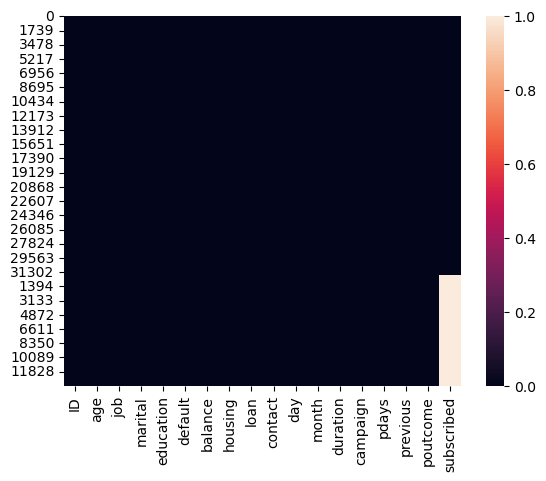

In [10]:
sns.heatmap(df.isnull())

In [11]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [14]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Here we have extracted the value counts of the columns and the number of unique value present in the colmuns.

In [16]:
df.nunique()

ID            45211
age              77
job              12
marital           3
education         4
default           2
balance        7168
housing           2
loan              2
contact           3
day              31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          4
subscribed        2
dtype: int64

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [18]:
encode = oe.fit_transform(df[["job","marital","education","default",
                             "housing","loan","contact","month",
                             "poutcome","subscribed"]])

In [19]:
df[["job","marital","education","default",
    "housing","loan","contact","month",
    "poutcome","subscribed"]] = encode

We have encode the columns for proceeding further in the analysis and model building,
Encoded the columns which have data in string object have been converted into integer we have used Ordinal Encoder for encoding the data.

In [20]:
df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
15760,21667,40,4.0,1.0,2.0,0.0,409,0.0,0.0,0.0,19,1.0,111,2,-1,0,3.0,0.0
4822,23024,53,9.0,1.0,1.0,0.0,0,0.0,0.0,0.0,26,1.0,392,2,-1,0,3.0,0.0
27556,2371,41,1.0,1.0,1.0,0.0,429,1.0,0.0,2.0,13,8.0,244,1,-1,0,3.0,0.0
24951,3498,60,7.0,2.0,0.0,0.0,313,1.0,0.0,2.0,15,8.0,920,2,-1,0,3.0,1.0
23991,23812,37,4.0,2.0,1.0,0.0,45,0.0,0.0,0.0,29,1.0,99,3,-1,0,3.0,0.0
21074,4462,36,9.0,1.0,1.0,0.0,412,1.0,1.0,2.0,20,8.0,127,1,-1,0,3.0,0.0
11357,43309,47,3.0,2.0,2.0,0.0,3232,0.0,0.0,1.0,16,7.0,294,1,274,2,0.0,0.0
10127,13885,46,1.0,1.0,0.0,0.0,-388,1.0,1.0,0.0,10,5.0,207,1,-1,0,3.0,0.0
10626,45188,32,7.0,2.0,1.0,0.0,1168,1.0,0.0,0.0,16,9.0,411,1,-1,0,3.0,1.0
1620,35295,36,2.0,1.0,2.0,0.0,4576,1.0,0.0,0.0,7,8.0,272,1,-1,0,3.0,0.0


In [21]:
df.dtypes

ID              int64
age             int64
job           float64
marital       float64
education     float64
default       float64
balance         int64
housing       float64
loan          float64
contact       float64
day             int64
month         float64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
subscribed    float64
dtype: object

In [22]:
df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,31647.000000
mean,22606.000000,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.117389
std,13051.435847,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321888
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11303.500000,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22606.000000,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33908.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


Filling out the null values and showing the mathematical description for the columns.

In [23]:
df["subscribed"].fillna(df["subscribed"].median(), inplace=True)

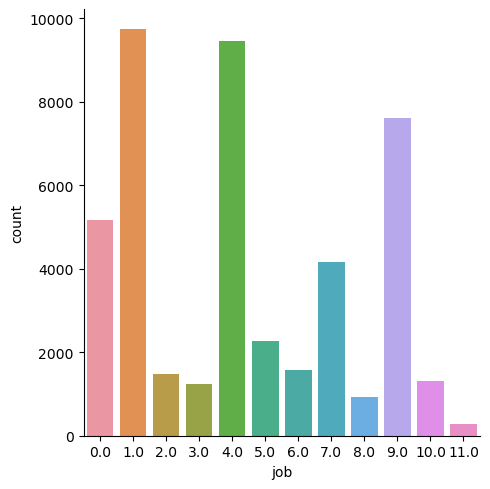

In [24]:
sns.catplot (x = "job", data=df, kind="count")

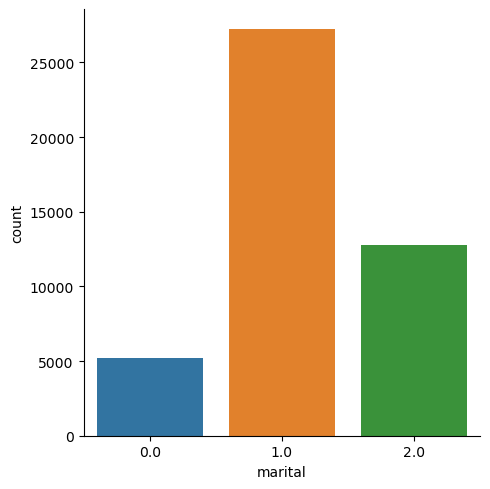

In [25]:
sns.catplot (x="marital" , data=df, kind="count")

ID               Axes(0.125,0.653529;0.110714x0.226471)
age           Axes(0.257857,0.653529;0.110714x0.226471)
job           Axes(0.390714,0.653529;0.110714x0.226471)
marital       Axes(0.523571,0.653529;0.110714x0.226471)
education     Axes(0.656429,0.653529;0.110714x0.226471)
default       Axes(0.789286,0.653529;0.110714x0.226471)
balance          Axes(0.125,0.381765;0.110714x0.226471)
housing       Axes(0.257857,0.381765;0.110714x0.226471)
loan          Axes(0.390714,0.381765;0.110714x0.226471)
contact       Axes(0.523571,0.381765;0.110714x0.226471)
day           Axes(0.656429,0.381765;0.110714x0.226471)
month         Axes(0.789286,0.381765;0.110714x0.226471)
duration             Axes(0.125,0.11;0.110714x0.226471)
campaign          Axes(0.257857,0.11;0.110714x0.226471)
pdays             Axes(0.390714,0.11;0.110714x0.226471)
previous          Axes(0.523571,0.11;0.110714x0.226471)
poutcome          Axes(0.656429,0.11;0.110714x0.226471)
subscribed        Axes(0.789286,0.11;0.110714x0.

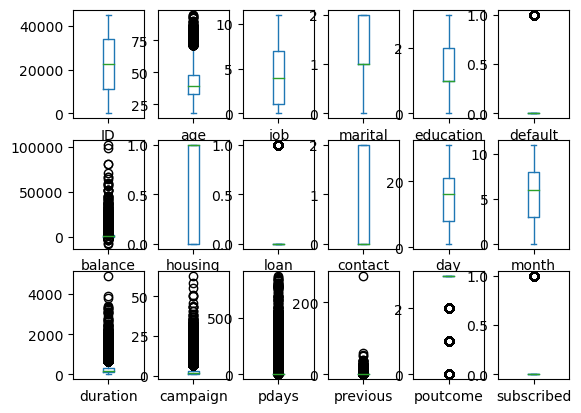

In [26]:
df.plot (kind="box", subplots=True, layout=(3,6))

Finding out the outliers from the dataset.

<Axes: >

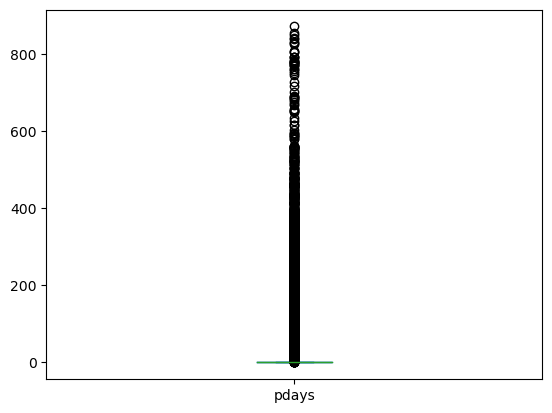

In [27]:
df["pdays"].plot.box()

<Axes: >

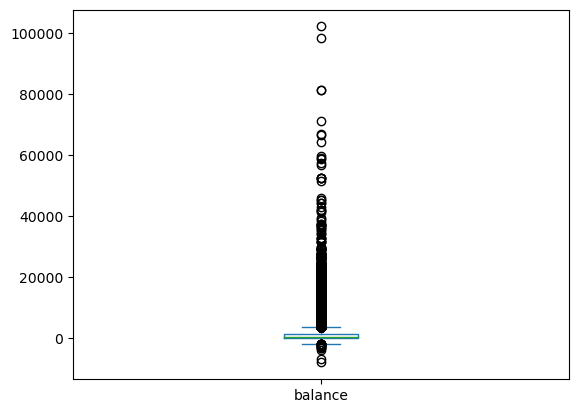

In [28]:
df["balance"].plot.box()

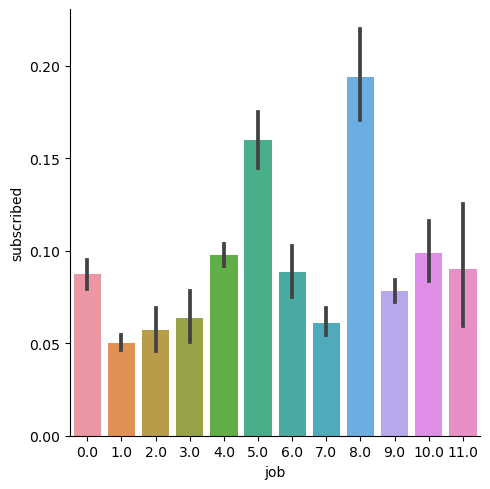

In [29]:
sns.catplot (x ="job", y="subscribed", data=df, kind="bar")

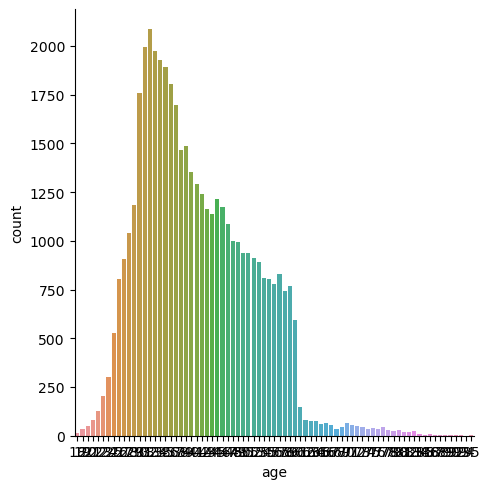

In [30]:
sns.catplot(x="age", data=df, kind="count", )

In [31]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0


Spillting out the Data into X and Y.

In [32]:
x = df.drop(["ID","subscribed","age"], axis=1)
x

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0
1,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0
2,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0
3,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0
4,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [33]:
y = df["subscribed"]
y

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
13559    0.0
13560    0.0
13561    0.0
13562    0.0
13563    0.0
Name: subscribed, Length: 45211, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
x_train ,  x_test , y_train , y_test = train_test_split(x , y , test_size=0.20, random_state=42)

In [35]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((36168, 15), (9043, 15), (36168,), (9043,))

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)

RandomForestClassifier()

In [37]:
pred_rfc =  rfc.predict(x_test)
pred_rfc

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
sc_rfc = accuracy_score(y_test , pred_rfc)
sc_rfc

0.9185004976224704

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [40]:
pred_lr = lr.predict(x_test)
pred_lr

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
sc_lr = accuracy_score(y_test , pred_lr)
sc_lr

0.917394669910428

In [42]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train)

SVC()

In [43]:
pred_svc = svc.predict(x_test)
pred_svc

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
sc_svc = accuracy_score(y_test , pred_svc)
sc_svc

0.9185004976224704

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [46]:
pred_dtc = dtc.predict(x_test)
pred_dtc

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
sc_dtc = accuracy_score(y_test , pred_dtc)
sc_dtc

0.8853256662611965

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [49]:
pred_gnb = gnb.predict(x_test)
pred_gnb

array([0., 0., 0., ..., 0., 1., 0.])

In [50]:
sc_gnb = accuracy_score(y_test , pred_gnb)
sc_gnb

0.8614397876810793

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train , y_train)

ExtraTreesClassifier()

In [52]:
pred_etc = etc.predict(x_test)
pred_etc

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
sc_etc = accuracy_score(y_test , pred_etc)
sc_etc

0.9180581665376535

In [54]:
print("Results from Random Forest Classifier :-",sc_rfc)
print("Results from Logistic Regression :-",sc_lr)
print("Results from SVC :-",sc_svc)
print("Results from Decision Tree Classifier :-",sc_dtc)
print("Results from GaussianNB :-",sc_gnb)
print("Results from Extra Tree Classifier :-",sc_etc)

Results from Random Forest Classifier :- 0.9185004976224704
Results from Logistic Regression :- 0.917394669910428
Results from SVC :- 0.9185004976224704
Results from Decision Tree Classifier :- 0.8853256662611965
Results from GaussianNB :- 0.8614397876810793
Results from Extra Tree Classifier :- 0.9180581665376535


In [55]:
data = (4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = rfc.predict(data_reshaped)
print(prediction)

[1.]


In [56]:
if (prediction[0]==1):
    print("Subscribed")
else:
    print("Not Subscribed")

Subscribed


Here we have built the model to predict that customer has Subscribed for the Term Deposit or Not Subcribed for the Term Deposit,
Model is been built using the Random Forest Classifier which show result of 0.9185004976224704 and we have also used other classifier for the model result but best result is coming from Random Forest Classifier.

# Restaurant Food Cost

In [3]:
train_df = pd.read_excel(r"C:\Users\abc\Downloads\Data_Train.xlsx")
test_df = pd.read_excel(r"C:\Users\abc\Downloads\Data_Test.xlsx")

In [4]:
train_df.shape

(12690, 9)

In [5]:
test_df.shape

(4231, 8)

In [6]:
df = train_df.append(test_df)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In this Dataset we have 16921 Number of Rows and Number of columns is 9 where columns Cost is the target variable and other columns have data on that basis model to predict the COST of 02 person is predicted.

In [7]:
print('Number of Rows = ',df.shape[0])
print('Number of Columns = ',df.shape[1])

Number of Rows =  16921
Number of Columns =  9


In [8]:
df.sample(20)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
2198,CASUAL DINING,7327,Biryani,"12noon – 10:30pm (Mon-Fri),12:30pm – 11:30pm...",Bangalore,Kalyan Nagar,4.0,249 votes,NaN
1655,CASUAL DINING,14932,"South Indian, North Indian, Chinese, Maharasht...",7am – 10:30pm (Mon-Sun),Bangalore,Mysore Road,4.0,967 votes,NaN
10890,CASUAL DINING,2994,"Biryani, Chettinad, Chinese, Arabian, Mughlai","11am – 3:30pm, 5pm – 2am (Mon-Sun)",Chennai,Ashok Nagar,3.9,192 votes,500.0
2841,FOOD TRUCK,13802,Italian,4:30pm – 10:30pm (Mon-Sun),Chennai,Ashok Nagar,3.7,38 votes,300.0
2541,"PUB,MICROBREWERY",1530,Bar Food,12noon – 12midnight (Mon-Sun),Gurgaon,Sector 29,4.2,1626 votes,1500.0
11387,CASUAL DINING,10937,Chinese,"Closed (Mon),12noon – 2:45pm, 7pm – 10:45pm...",Chennai,Nungambakkam,4.0,317 votes,450.0
12376,QUICK BITES,9427,"Fast Food, Beverages, Ice Cream, Juices, Sandwich",8am – 10pm (Mon-Sun),Bangalore,Sarjapur Road,3.7,28 votes,150.0
9953,QUICK BITES,6809,"Italian, Pizza",11am – 5am (Mon-Sun),Mumbai,Khar West,3.7,332 votes,500.0
11619,QUICK BITES,463,"Arabian, North Indian",11am – 12midnight (Mon-Sun),Kochi,Aluva,NEW,NaN,300.0
7206,CASUAL DINING,12675,"Andhra, North Indian, Chinese","12noon – 4pm, 7pm – 11pm (Mon-Sun)",Hyderabad,Somajiguda,4.1,819 votes,800.0


In [9]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [10]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
df['VOTES']=df['VOTES'].str.replace('votes','').astype(float)

In [13]:
df['VOTES']=df['VOTES'].fillna(df['VOTES'].mean())

In [14]:
df['VOTES'].isnull().sum()

0

In [15]:
df['RATING'] = df["RATING"].replace("-", np.NaN)
df['RATING'] = df["RATING"].replace("NEW", np.NaN)

In [16]:
df['RATING'].isnull().sum()

1606

In [17]:
df['RATING'].fillna(df['RATING'].mode().values[0], inplace=True)

In [18]:
df['RATING']=df['RATING'].astype(float)

In [19]:
df['RATING'].isnull().sum()

0

In [20]:
df['CITY']=df['CITY'].fillna('missing')
df['LOCALITY']=df['LOCALITY'].fillna('missing')

In [21]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['TITLE','CUISINES','TIME','CITY','LOCALITY'] 
for i in col:
    df[i] = le.fit_transform(df[i])

In [23]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,34,9438,3294,898,400,328,3.6,49.000000,1200.0
1,36,13198,364,2301,75,1214,4.2,30.000000,1500.0
2,34,10915,3729,806,75,1272,3.8,221.000000,800.0
3,104,6346,5156,340,277,161,4.1,24.000000,800.0
4,55,15387,2218,750,277,709,3.8,165.000000,300.0
...,...,...,...,...,...,...,...,...,...
4226,34,9057,4259,290,316,1184,3.9,287.000000,NaN
4227,95,1247,785,750,42,461,4.3,469.000000,NaN
4228,104,8617,2089,2896,128,1370,3.7,53.000000,NaN
4229,104,6485,4580,605,216,642,3.9,419.194254,NaN


In [24]:
df["COST"].fillna(df["COST"].mean(), inplace=True)

In [25]:
df.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,65.004137,7767.211631,2801.322380,1446.928491,178.173808,761.234206,3.795438,419.194254,655.252246
std,35.875571,4493.287626,1504.771403,925.974559,109.323333,464.107691,0.405681,799.060550,542.979598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,20.000000
25%,34.000000,3873.000000,1478.000000,681.000000,75.000000,389.000000,3.600000,64.000000,350.000000
50%,64.000000,7751.000000,3054.000000,1372.000000,160.000000,674.000000,3.900000,202.000000,600.000000
75%,104.000000,11672.000000,4008.000000,2265.000000,277.000000,1174.000000,4.000000,419.194254,655.252246
max,122.000000,15573.000000,5182.000000,3294.000000,450.000000,1636.000000,4.900000,41186.000000,14000.000000


<Axes: >

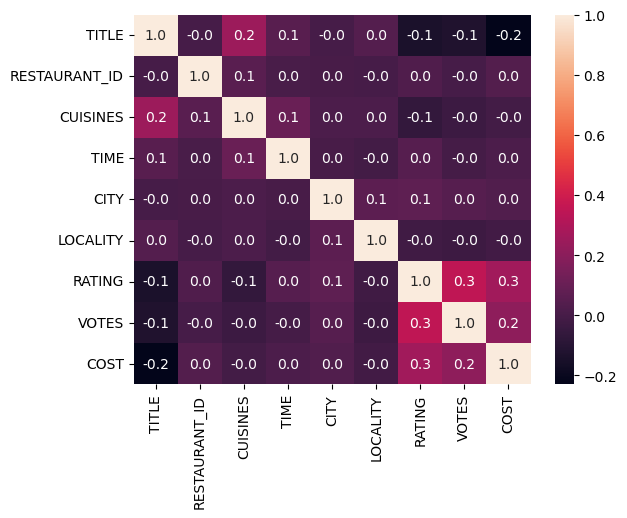

In [26]:
sns.heatmap(df.corr(), annot=True , fmt=".1f")

TITLE               Axes(0.125,0.653529;0.227941x0.226471)
RESTAURANT_ID    Axes(0.398529,0.653529;0.227941x0.226471)
CUISINES         Axes(0.672059,0.653529;0.227941x0.226471)
TIME                Axes(0.125,0.381765;0.227941x0.226471)
CITY             Axes(0.398529,0.381765;0.227941x0.226471)
LOCALITY         Axes(0.672059,0.381765;0.227941x0.226471)
RATING                  Axes(0.125,0.11;0.227941x0.226471)
VOTES                Axes(0.398529,0.11;0.227941x0.226471)
COST                 Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

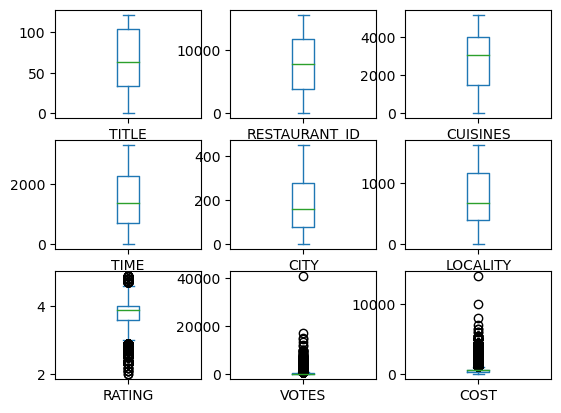

In [27]:
df.plot(kind="box", subplots=True, layout=(3,3))

<Axes: >

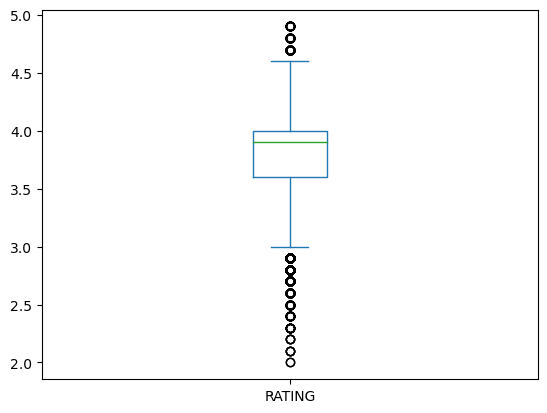

In [28]:
df["RATING"].plot.box()

<Axes: >

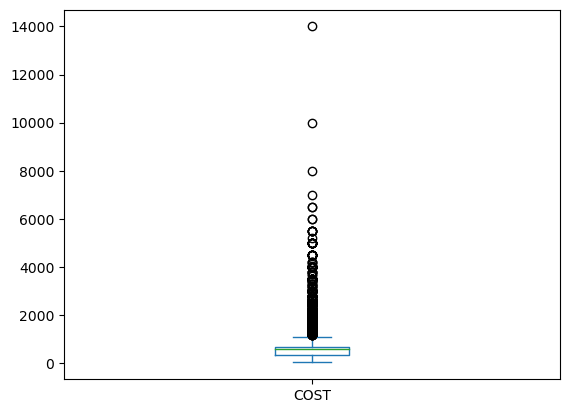

In [29]:
df["COST"].plot.box()

<Axes: >

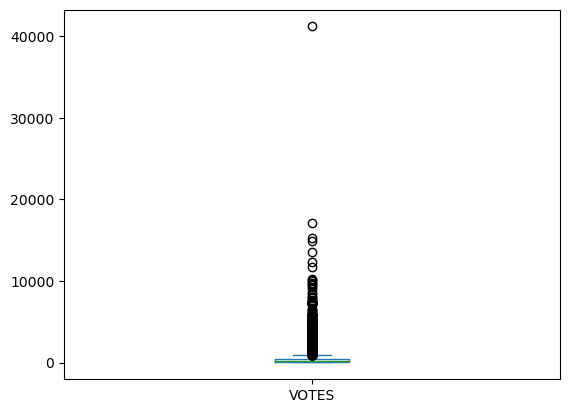

In [30]:
df["VOTES"].plot.box()

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))   
z
threshold = 3
print(np.where(z>3))

(array([   68,    84,   159,   186,   196,   208,   293,   303,   304,
         308,   337,   344,   354,   379,   422,   431,   469,   502,
         510,   563,   599,   637,   672,   688,   731,   770,   775,
         796,   839,   852,   855,   872,   897,   913,   933,   966,
         967,   973,  1008,  1020,  1034,  1038,  1078,  1132,  1133,
        1147,  1151,  1193,  1244,  1288,  1345,  1346,  1395,  1467,
        1470,  1475,  1476,  1519,  1522,  1540,  1589,  1594,  1617,
        1632,  1652,  1657,  1681,  1685,  1752,  1759,  1773,  1778,
        1816,  1828,  1850,  1878,  1884,  1916,  1930,  1931,  1973,
        2068,  2090,  2100,  2111,  2116,  2123,  2130,  2144,  2188,
        2204,  2205,  2207,  2247,  2258,  2268,  2290,  2302,  2305,
        2305,  2333,  2339,  2349,  2369,  2459,  2488,  2523,  2531,
        2565,  2604,  2610,  2622,  2683,  2686,  2689,  2695,  2740,
        2778,  2839,  2886,  2905,  2921,  2940,  2969,  2973,  2977,
        3002,  3028

<Axes: ylabel='Frequency'>

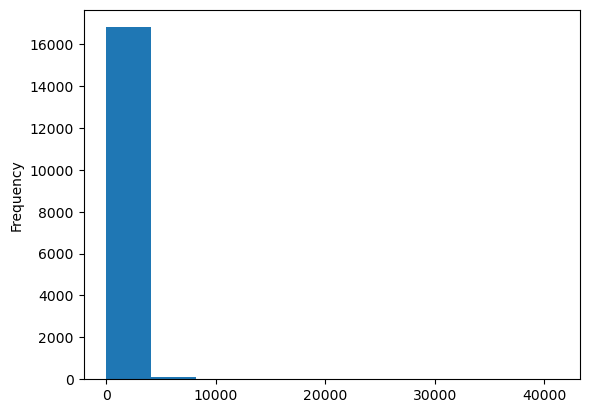

In [32]:
df["VOTES"].plot.hist()

<Axes: ylabel='Frequency'>

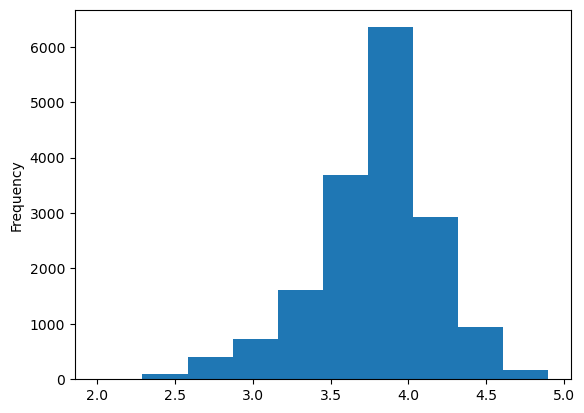

In [33]:
df["RATING"].plot.hist()

<Axes: ylabel='Frequency'>

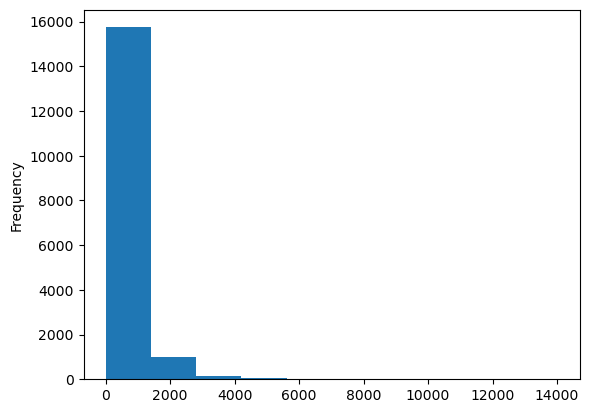

In [34]:
df["COST"].plot.hist()

In [35]:
from scipy.stats import boxcox
df["RATING"] = boxcox(df["RATING"],0)
df["VOTES"] = boxcox(df["VOTES"],0)
df["COST"] = boxcox(df["COST"],0)

<Axes: ylabel='Frequency'>

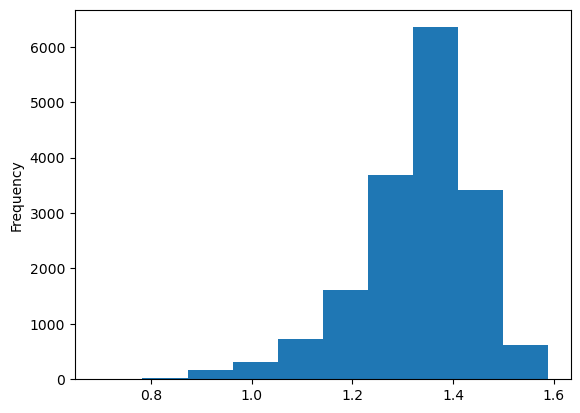

In [36]:
df["RATING"].plot.hist()

<Axes: ylabel='Frequency'>

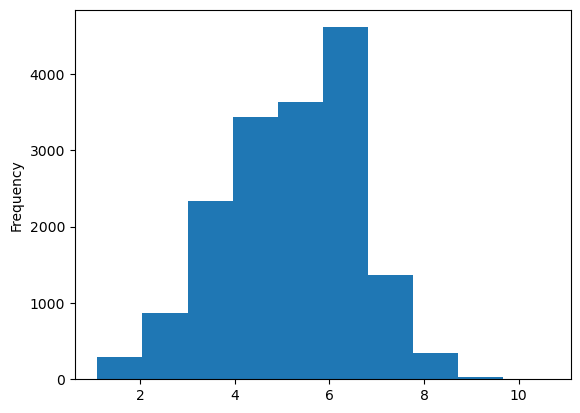

In [37]:
df["VOTES"].plot.hist()

<Axes: ylabel='Frequency'>

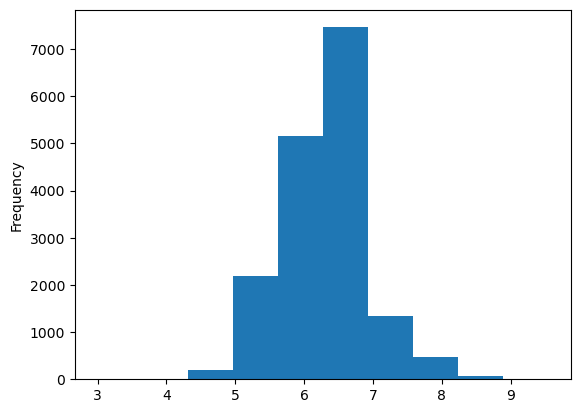

In [38]:
df["COST"].plot.hist()

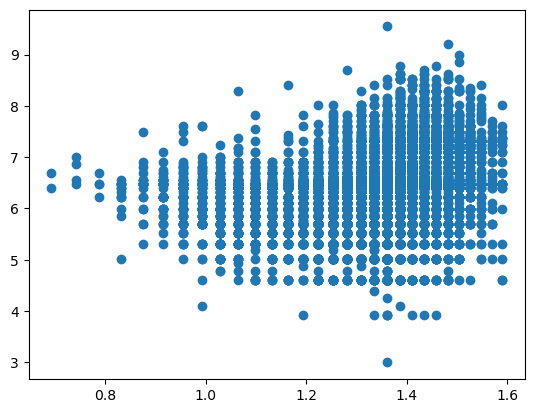

In [39]:
plt.scatter(df["RATING"],df["COST"])

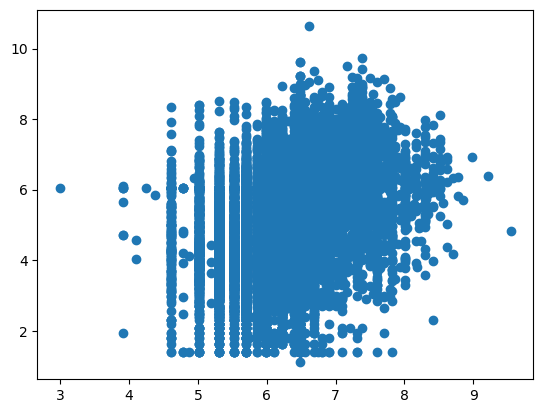

In [40]:
plt.scatter(df["COST"],df["VOTES"])

In [41]:
x = df.drop(["COST","RESTAURANT_ID"], axis=1)
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,34,3294,898,400,328,1.280934,3.891820
1,36,364,2301,75,1214,1.435085,3.401197
2,34,3729,806,75,1272,1.335001,5.398163
3,104,5156,340,277,161,1.410987,3.178054
4,55,2218,750,277,709,1.335001,5.105945
...,...,...,...,...,...,...,...
4226,34,4259,290,316,1184,1.360977,5.659482
4227,95,785,750,42,461,1.458615,6.150603
4228,104,2089,2896,128,1370,1.308333,3.970292
4229,104,4580,605,216,642,1.360977,6.038334


In [42]:
y = df["COST"]
y

0       7.090077
1       7.313220
2       6.684612
3       6.684612
4       5.703782
          ...   
4226    6.485020
4227    6.485020
4228    6.485020
4229    6.485020
4230    6.485020
Name: COST, Length: 16921, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2, random_state=42)

In [44]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((13536, 7), (3385, 7), (13536,), (3385,))

In [45]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [46]:
pred_lr = lr.predict(x_test)
pred_lr

array([6.69191653, 6.39447805, 6.15380027, ..., 5.96327136, 6.37824895,
       6.71356185])

In [47]:
sc_lr = metrics.r2_score(y_test , pred_lr)
sc_lr

0.18215584481385183

In [48]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [49]:
pred_svm = svm.predict(x_test)
pred_svm

array([6.54127759, 6.39624106, 6.48697808, ..., 6.30400629, 6.30781241,
       6.43220202])

In [50]:
sc_svm = metrics.r2_score(y_test,pred_svm)
sc_svm

0.18884688159246232

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
pred_rfr

array([6.39552867, 5.88259828, 6.37141516, ..., 6.035419  , 5.96184629,
       7.038736  ])

In [52]:
sc_rfr = metrics.r2_score(y_test,pred_rfr)
sc_rfr

0.5082245784885439

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
pred_gbr

array([6.64359172, 6.05975504, 6.36830671, ..., 6.04743924, 5.84210901,
       6.91657502])

In [54]:
sc_gbr = metrics.r2_score(y_test,pred_gbr)
sc_gbr

0.4917511973712233

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train , y_train)
pred_dtc = dtc.predict(x_test)
pred_dtc

array([6.39692966, 6.68461173, 5.99146455, ..., 5.29831737, 5.52146092,
       7.43838353])

In [56]:
sc_dtc = metrics.r2_score(y_test, pred_dtc)
sc_dtc

0.07154527780870756

In [57]:
print("Results from Linear Regression :-",sc_lr)
print("Results from SVR :-",sc_svm)
print("Results from Random Forest Regressor :-",sc_rfr)
print("Results from Gradient Boosting Regressor :-", sc_gbr)
print("Results from Decision Tree Regressor :-", sc_dtc)

Results from Linear Regression :- 0.18215584481385183
Results from SVR :- 0.18884688159246232
Results from Random Forest Regressor :- 0.5082245784885439
Results from Gradient Boosting Regressor :- 0.4917511973712233
Results from Decision Tree Regressor :- 0.07154527780870756


In [58]:
data = (104,5156,340,277,161,4.1,24.000000)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = rfr.predict(data_reshaped)
print("COST for 02 people is = ",prediction/0.01)

COST for 02 people is =  [606.79962353]


Here we have built the model to predict the cost for 02 people for food in and restaurant, 
We have used Regressor models to build the prediction model and the best result is received from the Random Forest Regressor is 0.5082245784885439 using the same model is been built here other Regressor are also used but Best result is coming from the Random Forest Regressor.